# Analysis of results from the analytical model and the simulation

In [1]:
import analytical_model as am
import simulation_model as sm
import data as dt

Show the results of the analytical model

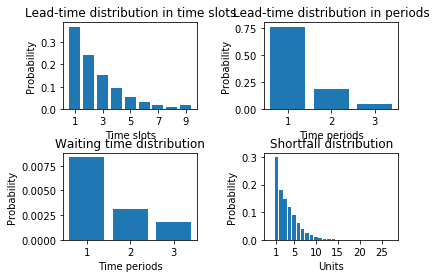

In [2]:
am.make_graphs(am.do_analysis(dt.data_sets[0]))

Show the convergance between the analitical model and the simulation

ana,1.915,1.287,2.582,1.867,0.020,0.190,3.314,2.408
sim,1.918,1.302,2.582,1.867,0.020,0.190,3.309,2.427


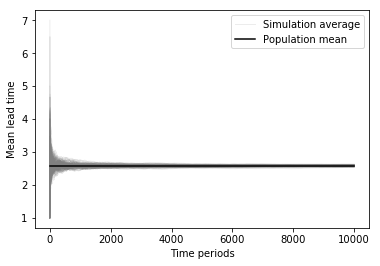

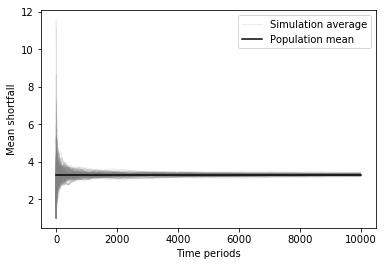

In [3]:
sm.convergence_plot(dt.data_sets[0])

## Simulation for all instances
All instances are run in the analytical model and the simulation. 
The results are stored in a JSON file with named with a timestamp.

In [ ]:
# The results are stored in a json file
sm.compare_multiple(dt.data_sets)

## Boxplot comparison
Make boxplot to compare the percentage deviation

In [4]:
results_path = '20170831190718.json'

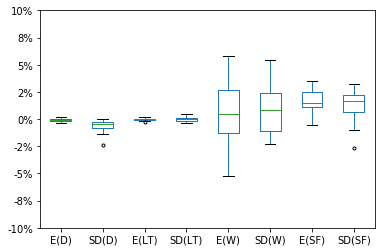

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import data as dt

with open(results_path) as data_file:
    data = json.load(data_file)
diff = []
heading = ['mean_demand', 'sd_demand', 'mean_lead_time', 'sd_lead_time',
           'mean_wait', 'sd_wait', 'mean_n_in_system', 'sd_n_in_system']
for i, result in enumerate(data):
    a = result['analytical_model']
    m = result['simulation_model']
    entry = {s: 100 * (a[s] - m[s]) / a[s] for s in heading}
    entry['set'] = i
    diff.append(entry)

fig, ax = plt.subplots()
df = pd.DataFrame.from_records(diff)
ax = df.boxplot(column=['mean_demand', 'sd_demand', 'mean_lead_time', 'sd_lead_time',
                        'mean_wait', 'sd_wait', 'mean_n_in_system', 'sd_n_in_system'],
                ax=ax, sym='.')
ax.set_xticklabels(['E(D)', 'SD(D)', 'E(LT)', 'SD(LT)', 'E(W)', 'SD(W)', 'E(SF)', 'SD(SF)'])
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%0.0f%%'))
ax.set_ylim([-10, 10])
ax.grid(linestyle='None')
plt.show()
fig.savefig('boxplot.pdf', format='pdf')